# Models Infomation (MACs, FLOPs, Parameters)

In [20]:
import warnings
warnings.filterwarnings("ignore")
import thop
from models.yolov5 import Yolov5
from models.yolo_repvgg import Yolo_repvgg
from models.yolo_mobilenet import Yolo_mobilenetv2
from models.yolo_ghostnet import Yolo_ghostnet
from models.yolo_mobilenetv3 import Yolo_mobilenetv3
from models.yolo_resnet18 import Yolo_resnet18
import torch
import matplotlib.pyplot as plt
%matplotlib inline

models = [Yolov5('models/yolov5s.yaml'), 
          Yolo_repvgg('models/yolo_repvgg.yaml'),
          Yolo_mobilenetv2('models/yolo_mobilenet.yaml'),
          Yolo_mobilenetv3('models/yolo_mobilenetv3.yaml'),
          Yolo_ghostnet('models/yolo_ghostnet.yaml'),
          Yolo_resnet18('models/yolo_resnet18.yaml')
         ]

model_names = ['Yolov5', 'Yolo_repvgg', 'Yolo_mobilenetv2', 'Yolo_mobilenetv3', 'Yolo_ghostnet', 'Yolo_resnet18']
dumb = torch.randn(1, 3, 320, 320)
macs_ = []
params_ = []
flops_ = []
for model in models:
    macs, params = thop.profile(model, inputs=(dumb,), verbose=False)
    macs_.append(macs)
    params_.append(params)
    flops_.append(2*macs)
    print('{}:  {} macs, {} FLOPs, {} parameters.'.format(model.__class__.__name__, macs, 2*macs, params))

Yolov5:  2066557900.0 macs, 4133115800.0 FLOPs, 7235389.0 parameters.
Yolo_repvgg:  6773226300.0 macs, 13546452600.0 FLOPs, 15066081.0 parameters.
Yolo_mobilenetv2:  981862600.0 macs, 1963725200.0 FLOPs, 3779809.0 parameters.
Yolo_mobilenetv3:  1011367556.0 macs, 2022735112.0 FLOPs, 4735377.0 parameters.
Yolo_ghostnet:  699490404.0 macs, 1398980808.0 FLOPs, 4807461.0 parameters.
Yolo_resnet18:  5083216700.0 macs, 10166433400.0 FLOPs, 13234721.0 parameters.


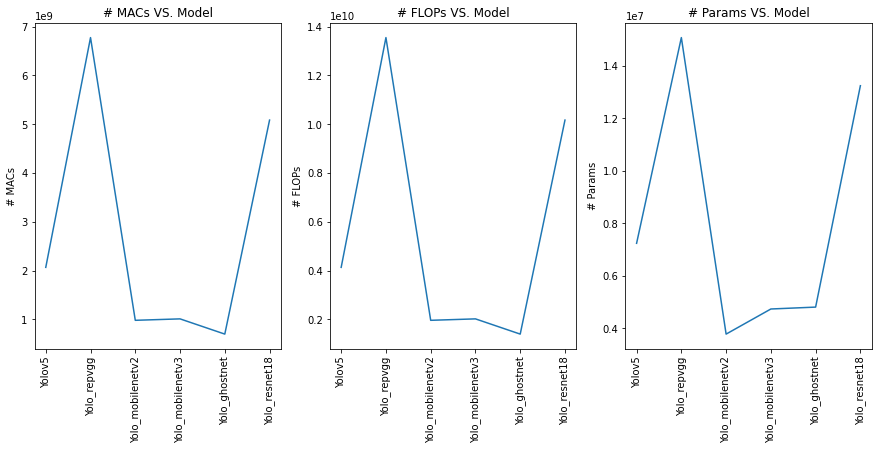

In [19]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(model_names, macs_)
ax1.set_xticklabels(model_names, rotation=90)
ax1.set_title('# MACs VS. Model')
ax1.set_ylabel('# MACs')

ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(model_names, flops_)
ax2.set_xticklabels(model_names, rotation=90)
ax2.set_title('# FLOPs VS. Model')
ax2.set_ylabel('# FLOPs')

ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(model_names, params_)
ax3.set_xticklabels(model_names, rotation=90)
ax3.set_title('# Params VS. Model')
ax3.set_ylabel('# Params')

plt.show()

# Train Result

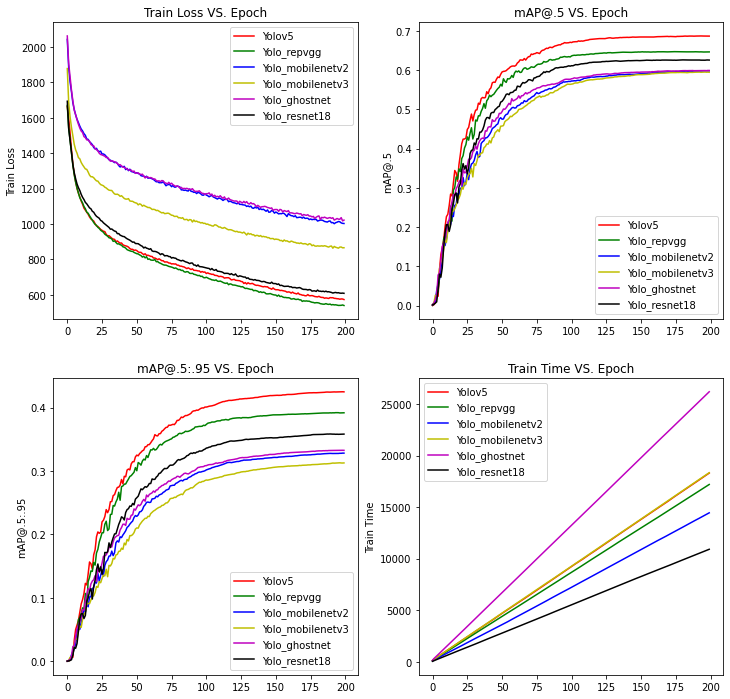

In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


v5 = torch.load('runs/train/yolov5/weights/last.pt')
repvgg = torch.load('runs/train/yolo_repvgg/weights/last.pt')
mobilenetv2 = torch.load('runs/train/yolo_mobilenet/weights/last.pt')
mobilenetv3 = torch.load('runs/train/yolo_mobilenetv3/weights/last.pt')
ghostnet = torch.load('runs/train/yolo_ghostnet/weights/last.pt')
resnet18 = torch.load('runs/train/yolo_resnet18/weights/last.pt')

model_names = ['Yolov5', 'Yolo_repvgg', 'Yolo_mobilenetv2', 'Yolo_mobilenetv3', 'Yolo_ghostnet', 'Yolo_resnet18']

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(v5['train_losses'], 'r', label='Yolov5')
ax1.plot(repvgg['train_losses'], 'g', label='Yolo_repvgg')
ax1.plot(mobilenetv2['train_losses'], 'b', label='Yolo_mobilenetv2')
ax1.plot(mobilenetv3['train_losses'], 'y', label='Yolo_mobilenetv3')
ax1.plot(ghostnet['train_losses'], 'm', label='Yolo_ghostnet')
ax1.plot(resnet18['train_losses'], 'k', label='Yolo_resnet18')
ax1.set_title('Train Loss VS. Epoch')
ax1.set_ylabel('Train Loss')
ax1.legend()

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(np.asarray(v5['test_results'])[:, 2], 'r', label='Yolov5')
ax2.plot(np.asarray(repvgg['test_results'])[:, 2], 'g', label='Yolo_repvgg')
ax2.plot(np.asarray(mobilenetv2['test_results'])[:, 2], 'b', label='Yolo_mobilenetv2')
ax2.plot(np.asarray(mobilenetv3['test_results'])[:, 2], 'y', label='Yolo_mobilenetv3')
ax2.plot(np.asarray(ghostnet['test_results'])[:, 2], 'm', label='Yolo_ghostnet')
ax2.plot(np.asarray(resnet18['test_results'])[:, 2], 'k', label='Yolo_resnet18')
ax2.set_title('mAP@.5 VS. Epoch')
ax2.set_ylabel('mAP@.5')
ax2.legend()

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.asarray(v5['test_results'])[:, 3], 'r', label='Yolov5')
ax3.plot(np.asarray(repvgg['test_results'])[:, 3], 'g', label='Yolo_repvgg')
ax3.plot(np.asarray(mobilenetv2['test_results'])[:, 3], 'b', label='Yolo_mobilenetv2')
ax3.plot(np.asarray(mobilenetv3['test_results'])[:, 3], 'y', label='Yolo_mobilenetv3')
ax3.plot(np.asarray(ghostnet['test_results'])[:, 3], 'm', label='Yolo_ghostnet')
ax3.plot(np.asarray(resnet18['test_results'])[:, 3], 'k', label='Yolo_resnet18')
ax3.set_title('mAP@.5:.95 VS. Epoch')
ax3.set_ylabel('mAP@.5:.95')
ax3.legend()

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(np.asarray(v5['train_times']), 'r', label='Yolov5')
ax4.plot(np.asarray(repvgg['train_times']), 'g', label='Yolo_repvgg')
ax4.plot(np.asarray(mobilenetv2['train_times']), 'b', label='Yolo_mobilenetv2')
ax4.plot(np.asarray(mobilenetv3['train_times']), 'y', label='Yolo_mobilenetv3')
ax4.plot(np.asarray(ghostnet['train_times']), 'm', label='Yolo_ghostnet')
ax4.plot(np.asarray(resnet18['train_times']), 'k', label='Yolo_resnet18')
ax4.set_title('Train Time VS. Epoch')
ax4.set_ylabel('Train Time')
ax4.legend()